In [1]:
import numpy as np
import pandas as pd
from stable_baselines3 import DQN
import pickle
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
RESULT_PATH = '/scratch/wf541/multirun/2021-12-06/02:36:29'

In [3]:
results = [os.path.join(RESULT_PATH, pth) for pth in os.listdir(RESULT_PATH) if (not pth.endswith('.yaml')) and (not pth.startswith('.'))]

In [4]:
results

['/scratch/wf541/multirun/2021-12-06/02:36:29/OUstd=0.15,gamma=0.999',
 '/scratch/wf541/multirun/2021-12-06/02:36:29/OUstd=0.5,gamma=0.99',
 '/scratch/wf541/multirun/2021-12-06/02:36:29/OUstd=0.5,gamma=0.999',
 '/scratch/wf541/multirun/2021-12-06/02:36:29/OUstd=0.1,gamma=0.99',
 '/scratch/wf541/multirun/2021-12-06/02:36:29/OUstd=0.15,gamma=0.99',
 '/scratch/wf541/multirun/2021-12-06/02:36:29/OUstd=0.1,gamma=0.999']

In [5]:
path = results[2]

In [6]:
action_oos_eval_path = os.path.join(path, 'action_fn_logs.h5')
action_eval_path = os.path.join(path, 'eval_path.pkl')
policy_function_path = os.path.join(path, 'policy_result_logs.h5')

In [7]:
oos_eval = pd.read_hdf(action_oos_eval_path)

In [8]:
oos_eval

,holdings,reward
0,-100.000000,-0.000000
1,-100.000000,-0.046927
2,-100.000000,-1.579637
3,-100.000000,-7.531154
4,-100.000000,-0.126354
...,...,...
499995,-61.319138,-2.321266
499996,-61.319138,-0.004814
499997,-61.319138,-0.046405
499998,-61.319138,-0.722884


In [9]:
oos_eval['idx'] = np.repeat(np.arange(oos_eval.shape[0] // (50 * 10000)), 50 * 10000)

In [10]:
oos_eval

,holdings,reward,idx
0,-100.000000,-0.000000,0
1,-100.000000,-0.046927,0
2,-100.000000,-1.579637,0
3,-100.000000,-7.531154,0
4,-100.000000,-0.126354,0
...,...,...,...
499995,-61.319138,-2.321266,71
499996,-61.319138,-0.004814,71
499997,-61.319138,-0.046405,71
499998,-61.319138,-0.722884,71


In [11]:
policy_function = pd.read_hdf(policy_function_path)
policy_function

,stock_price,obs_3,stock_holdings,time_to_maturity,obs_6,obs_7,t,delta,call_price,actions
0,98,1,-100,0.194444,0,0,0.98,0.416945,2.28864,-61.319138
1,98,1,-99,0.194444,0,0,0.98,0.416945,2.28864,-61.319138
2,98,1,-98,0.194444,0,0,0.98,0.416945,2.28864,-61.319138
3,98,1,-97,0.194444,0,0,0.98,0.416945,2.28864,-61.319138
4,98,1,-96,0.194444,0,0,0.98,0.416945,2.28864,-61.319138
...,...,...,...,...,...,...,...,...,...,...
76,102,1,-24,0.194444,0,0,0.98,0.612384,4.35113,-61.319138
77,102,1,-23,0.194444,0,0,0.98,0.612384,4.35113,-61.319138
78,102,1,-22,0.194444,0,0,0.98,0.612384,4.35113,-61.319138
79,102,1,-21,0.194444,0,0,0.98,0.612384,4.35113,-61.319138


In [12]:
eval_path = pickle.load(open(action_eval_path, 'rb'))

In [13]:
eval_path

,episode_idx,randn,time_to_maturity,cum_randn,price,all_1,normalized_time,delta,call_price
0,0,0.496714,0.003968,0.496714,100.288355,1.0,0.02,0.530675,3.733329
1,0,-0.138264,0.007937,0.358450,100.208161,1.0,0.04,0.527114,3.683771
2,0,0.647689,0.011905,1.006138,100.575190,1.0,0.06,0.543336,3.873056
3,0,1.523030,0.015873,2.529168,101.445763,1.0,0.08,0.581375,4.355528
4,0,-0.234153,0.019841,2.295015,101.309552,1.0,0.10,0.575568,4.269587
...,...,...,...,...,...,...,...,...,...
499995,9999,1.333620,0.182540,-6.315671,96.419048,1.0,0.92,0.341836,1.711387
499996,9999,-0.109756,0.186508,-6.425427,96.357521,1.0,0.94,0.338518,1.683471
499997,9999,-0.243695,0.190476,-6.669122,96.222937,1.0,0.96,0.331785,1.631411
499998,9999,-0.797460,0.194444,-7.466581,95.787339,1.0,0.98,0.311208,1.484546


In [14]:
reward_history = oos_eval.groupby('idx').reward.median()

In [15]:
reward_history

idx
0    -1.488045
1    -0.035413
2    -0.074625
3    -0.070668
4    -0.093068
        ...   
67   -0.026915
68   -0.027256
69   -0.027549
70   -0.034536
71   -0.058121
Name: reward, Length: 72, dtype: float64

[]

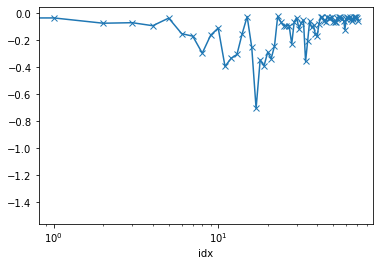

In [16]:
reward_history.plot(style='x-')
plt.semilogx()
#plt.xlim(10,)

In [17]:
eval_path[['holdings', 'reward']] = oos_eval.loc[oos_eval['idx'] == oos_eval['idx'].max(), ['holdings', 'reward']]

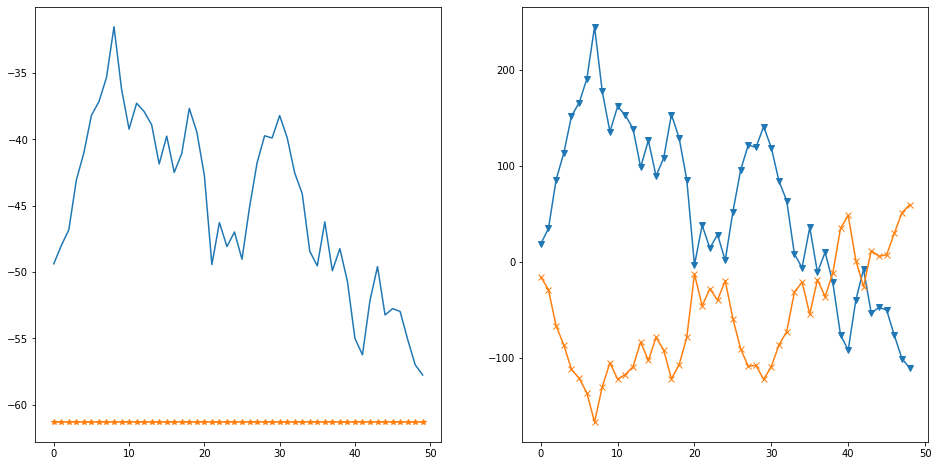

In [18]:
sample_experiment = eval_path.query('episode_idx==105')
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].plot(np.arange(50), sample_experiment.delta * -100, '-')
axes[0].plot(np.arange(50), sample_experiment.holdings, '*-')
axes[1].plot(np.arange(50), ((sample_experiment['price'].shift(-1) - sample_experiment['price']) * sample_experiment['holdings']).cumsum(), 'v-')
axes[1].plot(np.arange(50), ((sample_experiment['call_price'].shift(-1) - sample_experiment['call_price']) * 100).cumsum(), 'x-')



In [19]:
stock_holdings = np.arange(-100,-19)
delta_oom = - stock_holdings
delta_atm = -50 - stock_holdings
delta_itm = -100 - stock_holdings

In [20]:
oom_actions = list(policy_function.iloc[:81]['actions'])
atm_actions = list(policy_function.iloc[81:162]['actions'])
itm_actions = list(policy_function.iloc[162:]['actions'])

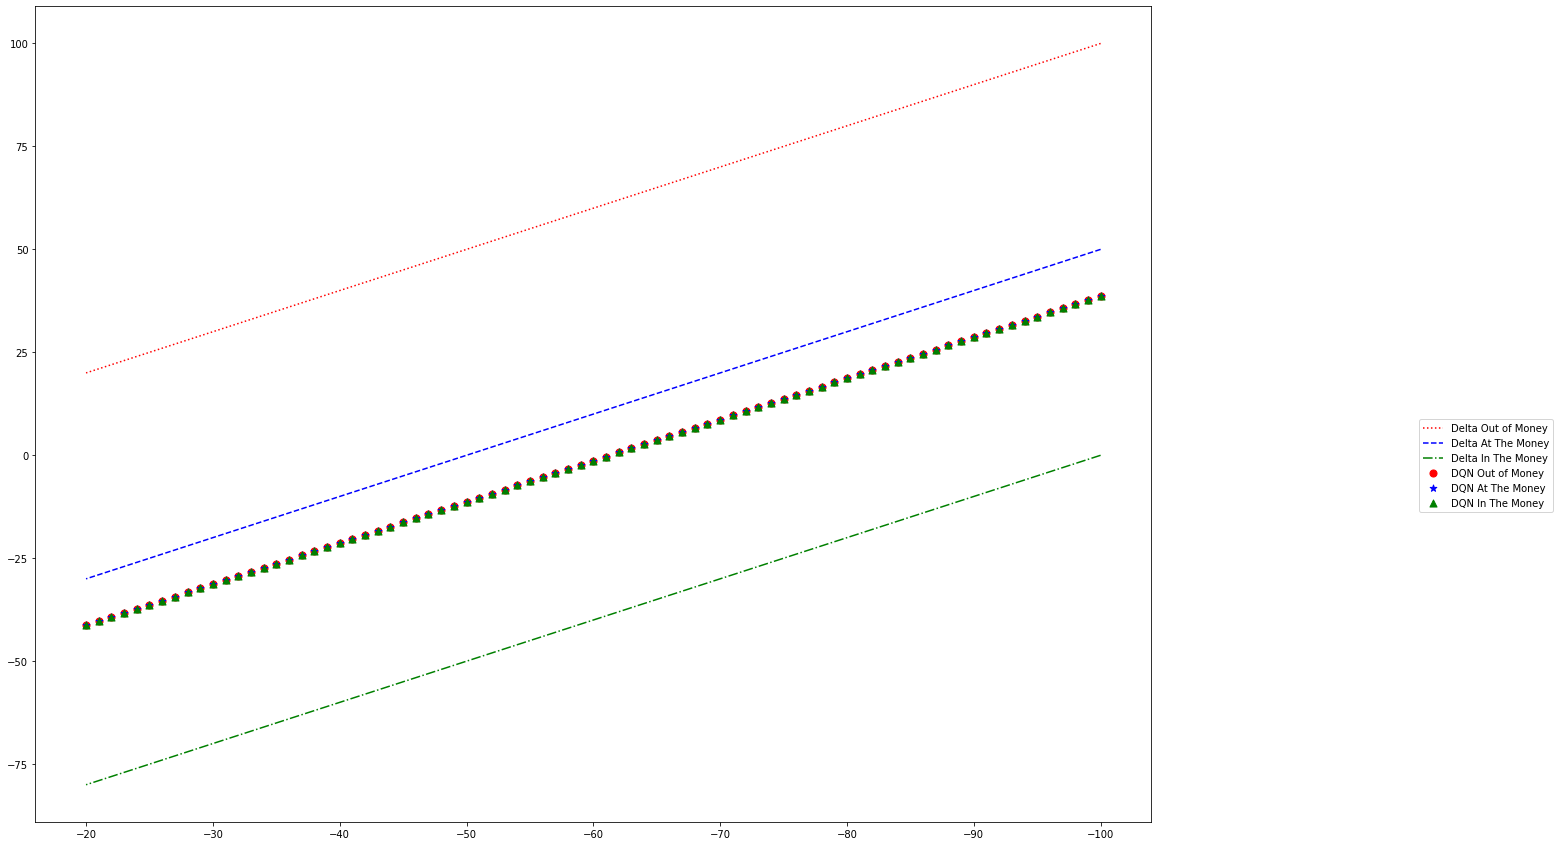

In [21]:
plt.figure(figsize=(20, 15))
plt.plot(stock_holdings, delta_oom, ls=":" , label="Delta Out of Money", color="red") 
plt.plot(stock_holdings, delta_atm, ls="--" , label="Delta At The Money", color="blue") 
plt.plot(stock_holdings, delta_itm, ls="-." , label="Delta In The Money", color="green") 
plt.scatter(stock_holdings, oom_actions - stock_holdings, marker='o', s=50, label="DQN Out of Money", color="red") 
plt.scatter(stock_holdings, atm_actions - stock_holdings, marker='*', s=50, label="DQN At The Money", color="blue") 
plt.scatter(stock_holdings, itm_actions - stock_holdings, marker='^', s=50, label="DQN In The Money", color="green") 
# plt.scatter(stock_holdings, oom_actions, label="DQN Out of Money", color="red", s=1) 
# plt.scatter(stock_holdings, atm_actions, label="DQN At The Money", color="blue", s=1) 
# plt.scatter(stock_holdings, itm_actions, label="DQN In The Money", color="green", s=1) 
plt.gca().invert_xaxis()
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 0.5), fancybox=True)